## Data Preprocessing

In [300]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')
import json
from datetime import datetime
import datetime

In [266]:
infile = r"LTlocation_20170124_104920.log"
with open(infile) as f:
    data = f.readlines()

In [267]:
len(data)

2999996

In [268]:
data = data[3:]
len(data)

2999993

In [269]:
data

['{\n',
 '  "areaId": "Tracking001",\n',
 '  "areaName": "Learning Theater Indoor",\n',
 '  "color": "#99FFFF",\n',
 '  "coordinateSystemId": "CoordSys001",\n',
 '  "coordinateSystemName": "Learning Theater",\n',
 '  "covarianceMatrix": [\n',
 '    1.19,\n',
 '    0.05,\n',
 '    0.05,\n',
 '    1.37\n',
 '  ],\n',
 '  "id": "b4994c877aa1",\n',
 '  "name": "005 dev",\n',
 '  "position": [\n',
 '    19.97,\n',
 '    5.03,\n',
 '    0\n',
 '  ],\n',
 '  "positionAccuracy": 0.53,\n',
 '  "positionTS": 1485272959147,\n',
 '  "smoothedPosition": [\n',
 '    19.59,\n',
 '    7.01,\n',
 '    0\n',
 '  ],\n',
 '  "zones": [{\n',
 '    "id": "Zone001",\n',
 '    "name": "Theater"\n',
 '  }]\n',
 '}\n',
 '{\n',
 '  "areaId": "Tracking001",\n',
 '  "areaName": "Learning Theater Indoor",\n',
 '  "color": "#33CC00",\n',
 '  "coordinateSystemId": "CoordSys001",\n',
 '  "coordinateSystemName": "Learning Theater",\n',
 '  "covarianceMatrix": [\n',
 '    1.97,\n',
 '    0.21,\n',
 '    0.21,\n',
 '    

In [270]:
for i,x in enumerate(data):
    if x == '  "zones": null\n':
        del data[i-22:i+2]

In [271]:
len(data)/31

96767.0

In [272]:
import json
obj = dict()
for i in range(96767):
    data_sam = data[i*31:(i+1)*31]
    data_sam = list(map(lambda s: s.strip(), data_sam))
    data_dict = str()
    for e in data_sam:
        data_dict += e
    obj[i] = json.loads(data_dict)

In [273]:
len(obj)

96767

In [276]:
name = list()
for ind, key in obj.items():
    name.append(key['name'])
set(name)

{'001 dev',
 '002 dev',
 '003 dev',
 '004 dev',
 '005 dev',
 '006 dev',
 '007 dev',
 '008 dev',
 '009 pub',
 '010 pub',
 '011 pub',
 '012 pub',
 '013 pub',
 '014 pub',
 '015 pub',
 '016 pub',
 '017 res',
 '018 res',
 '019 res',
 '020 res',
 '021 res',
 '022 res',
 '023 res',
 '024 res',
 None}

In [277]:
_id = list()
for ind, key in obj.items():
    _id.append(key['id'])
set(_id)

{'b4994c876dbb',
 'b4994c876dcb',
 'b4994c876de6',
 'b4994c877897',
 'b4994c877aa1',
 'b4994c877cb8',
 'b4994c877d82',
 'b4994c877eca',
 'b4994c877ee8',
 'b4994c877fa2',
 'b4994c878214',
 'b4994c878bf4',
 'b4994c8ba2c4',
 'b4994c8baa75',
 'b4994c8bb03f',
 'b4994c8bb06c',
 'b4994c8bbd65',
 'b4994c8bc342',
 'b4994c8bc951',
 'b4994c8bcc07',
 'b4994c8bce8d',
 'b4994c8bced4',
 'd05fb817c5f3',
 'd05fb817c8a3',
 'd05fb817f5c0',
 'd05fb817f6b9'}

In [279]:
positionAccuracy = list()
for ind, key in obj.items():
    positionAccuracy.append(key['positionAccuracy'])

In [280]:
smoothedPosition = list()
for ind, key in obj.items():
    smoothedPosition.append(key['smoothedPosition'])

In [281]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [358]:
X = list()
for i in smoothedPosition:
    X.append(i[0])

In [359]:
Y = list()
for i in smoothedPosition:
    Y.append(i[1])

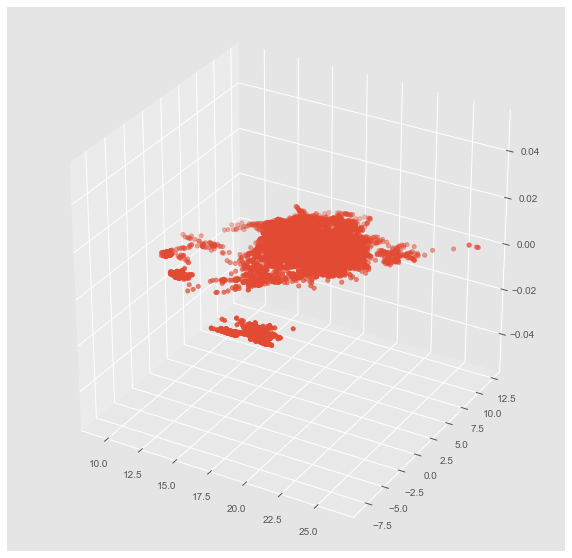

In [284]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z)

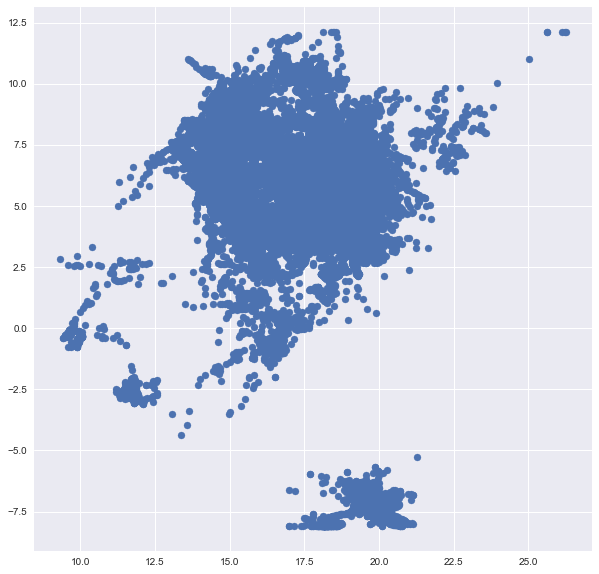

In [360]:
plt.scatter(X, Y)

In [288]:
positionTS = list()
for ind, key in obj.items():
    positionTS.append(key['positionTS'])

In [290]:
positionTS_datetime = list()
for dt in positionTS:
    positionTS_datetime.append(datetime.utcfromtimestamp((dt/1000)).strftime('%Y-%m-%d %H:%M:%S'))

In [291]:
df = pd.DataFrame({"ID":_id, "name": name, "X_coordinate":X, "Y_coordinate":Y, 
                 "positionAccuracy":positionAccuracy, "positionTS":positionTS, "positionTS_datetime":positionTS_datetime})

In [292]:
df.head()

,ID,X_coordinate,Y_coordinate,name,positionAccuracy,positionTS,positionTS_datetime
0,b4994c877aa1,19.59,7.01,005 dev,0.53,1485272959147,2017-01-24 15:49:19
1,b4994c877fa2,16.08,4.97,017 res,0.99,1485272959124,2017-01-24 15:49:19
2,b4994c8bced4,15.38,9.88,015 pub,0.63,1485272959299,2017-01-24 15:49:19
3,b4994c8bcc07,15.30,5.85,010 pub,0.58,1485272959122,2017-01-24 15:49:19
4,b4994c876dcb,16.62,6.22,002 dev,0.35,1485272959437,2017-01-24 15:49:19


In [293]:
df['positionTS_datetime'] = pd.to_datetime(df['positionTS_datetime'])
df['positionTS_date'] = df['positionTS_datetime'].dt.date
df['positionTS_time'] = df['positionTS_datetime'].dt.time

In [294]:
df.head()

,ID,X_coordinate,Y_coordinate,name,positionAccuracy,positionTS,positionTS_datetime,positionTS_date,positionTS_time
0,b4994c877aa1,19.59,7.01,005 dev,0.53,1485272959147,2017-01-24 15:49:19,2017-01-24,15:49:19
1,b4994c877fa2,16.08,4.97,017 res,0.99,1485272959124,2017-01-24 15:49:19,2017-01-24,15:49:19
2,b4994c8bced4,15.38,9.88,015 pub,0.63,1485272959299,2017-01-24 15:49:19,2017-01-24,15:49:19
3,b4994c8bcc07,15.30,5.85,010 pub,0.58,1485272959122,2017-01-24 15:49:19,2017-01-24,15:49:19
4,b4994c876dcb,16.62,6.22,002 dev,0.35,1485272959437,2017-01-24 15:49:19,2017-01-24,15:49:19


In [295]:
df['positionTS_datetime'].describe()

count                   96767
unique                   1142
top       2017-01-24 15:52:54
freq                      106
first     2017-01-24 15:49:15
last      2017-01-24 16:08:16
Name: positionTS_datetime, dtype: object

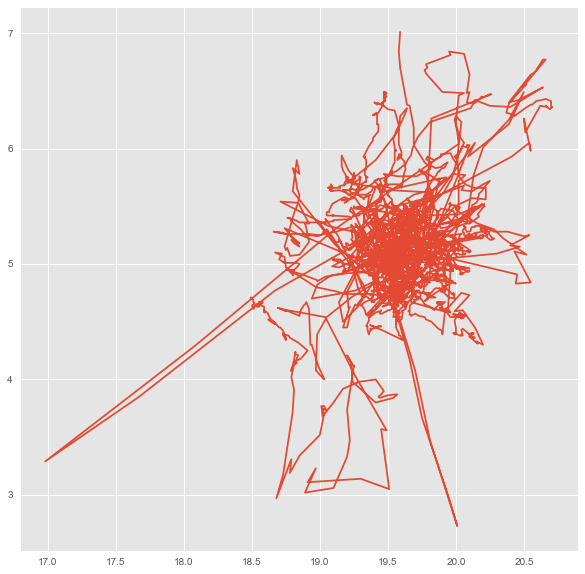

In [296]:
plt.plot(df[df['name'] == '005 dev']['X_coordinate'], df[df['name'] == '005 dev']['Y_coordinate'])

In [297]:
ids = list(df['ID'].unique())

In [298]:
ids

['b4994c877aa1',
 'b4994c877fa2',
 'b4994c8bced4',
 'b4994c8bcc07',
 'b4994c876dcb',
 'b4994c8bbd65',
 'd05fb817f5c0',
 'b4994c878bf4',
 'b4994c8bb03f',
 'b4994c8bc951',
 'b4994c876de6',
 'b4994c877ee8',
 'b4994c877eca',
 'b4994c877cb8',
 'b4994c8bce8d',
 'b4994c8baa75',
 'b4994c877897',
 'd05fb817c5f3',
 'd05fb817f6b9',
 'b4994c877d82',
 'd05fb817c8a3',
 'b4994c8ba2c4',
 'b4994c878214',
 'b4994c8bc342',
 'b4994c8bb06c',
 'b4994c876dbb']

In [299]:
df.groupby('positionTS_time')['ID'].nunique().sort_values(ascending=False)

positionTS_time
15:55:40    24
15:57:00    24
16:03:49    24
15:54:30    24
15:51:11    23
15:51:59    23
15:54:26    23
15:56:20    23
15:57:03    23
16:03:09    23
15:51:39    23
15:51:31    23
16:07:34    23
16:00:57    23
15:52:54    23
16:02:53    23
16:02:33    23
15:51:47    23
15:56:12    23
15:58:46    23
15:54:56    23
15:51:05    23
15:54:46    23
15:54:52    23
15:58:20    22
16:02:49    22
16:03:04    22
16:03:01    22
15:49:51    22
15:55:48    22
            ..
16:04:18    16
16:05:43    16
16:03:38    16
16:03:34    16
16:05:55    16
16:06:03    16
16:05:51    16
16:06:15    16
16:06:31    16
16:06:48    16
16:06:46    16
16:06:45    16
16:00:18    16
16:06:43    16
16:05:03    16
16:06:27    16
16:07:25    15
16:01:02    15
16:06:39    15
16:06:19    15
16:06:51    15
16:00:50    15
16:06:59    15
16:05:09    15
16:05:07    15
16:06:41    14
15:49:18     2
15:49:17     2
15:49:16     1
15:49:15     1
Name: ID, Length: 1142, dtype: int64

In [301]:
# Choose a single second with the most distinct sensors
df1 = df[df['positionTS_time'] == datetime.time(15, 55, 40)]

In [302]:
colors = np.array(df1['ID'].apply(ids.index))
colors

array([16,  1,  2, 18, 17, 13, 15, 12,  7,  6,  4, 16,  9,  0, 18,  1,  2,
        8, 14, 11, 12,  6, 16,  7, 10, 18, 17,  5, 13,  9, 15,  2, 10, 17,
       16,  4, 14,  1,  9,  2,  0,  8, 18, 11,  6,  5, 16, 15,  7, 12, 10,
       13, 18, 17,  4, 13,  9, 14, 15,  1, 12,  2,  8, 11,  0,  6,  7, 10,
       16,  8, 17,  5, 15, 11,  9, 12, 13,  7, 10,  1,  4, 14, 16,  2, 18,
       15,  5, 19, 24, 25, 23,  3, 20], dtype=int64)

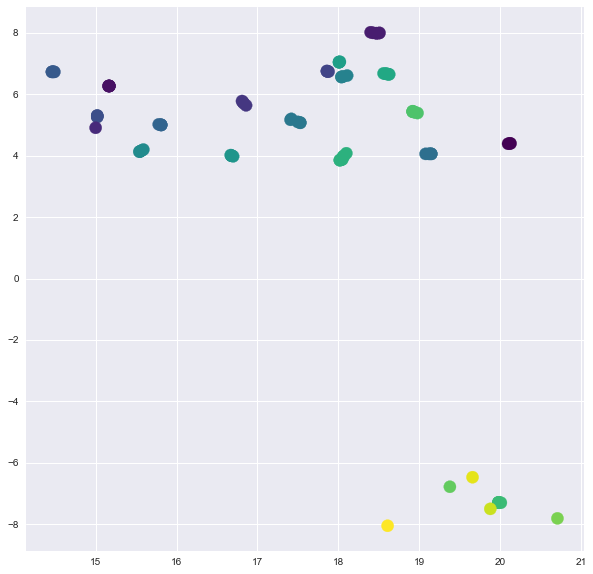

In [303]:
import seaborn as sns
sns.set()
plt.scatter(df1['X_coordinate'], df1['Y_coordinate'], c=colors, s=150, cmap ='viridis')

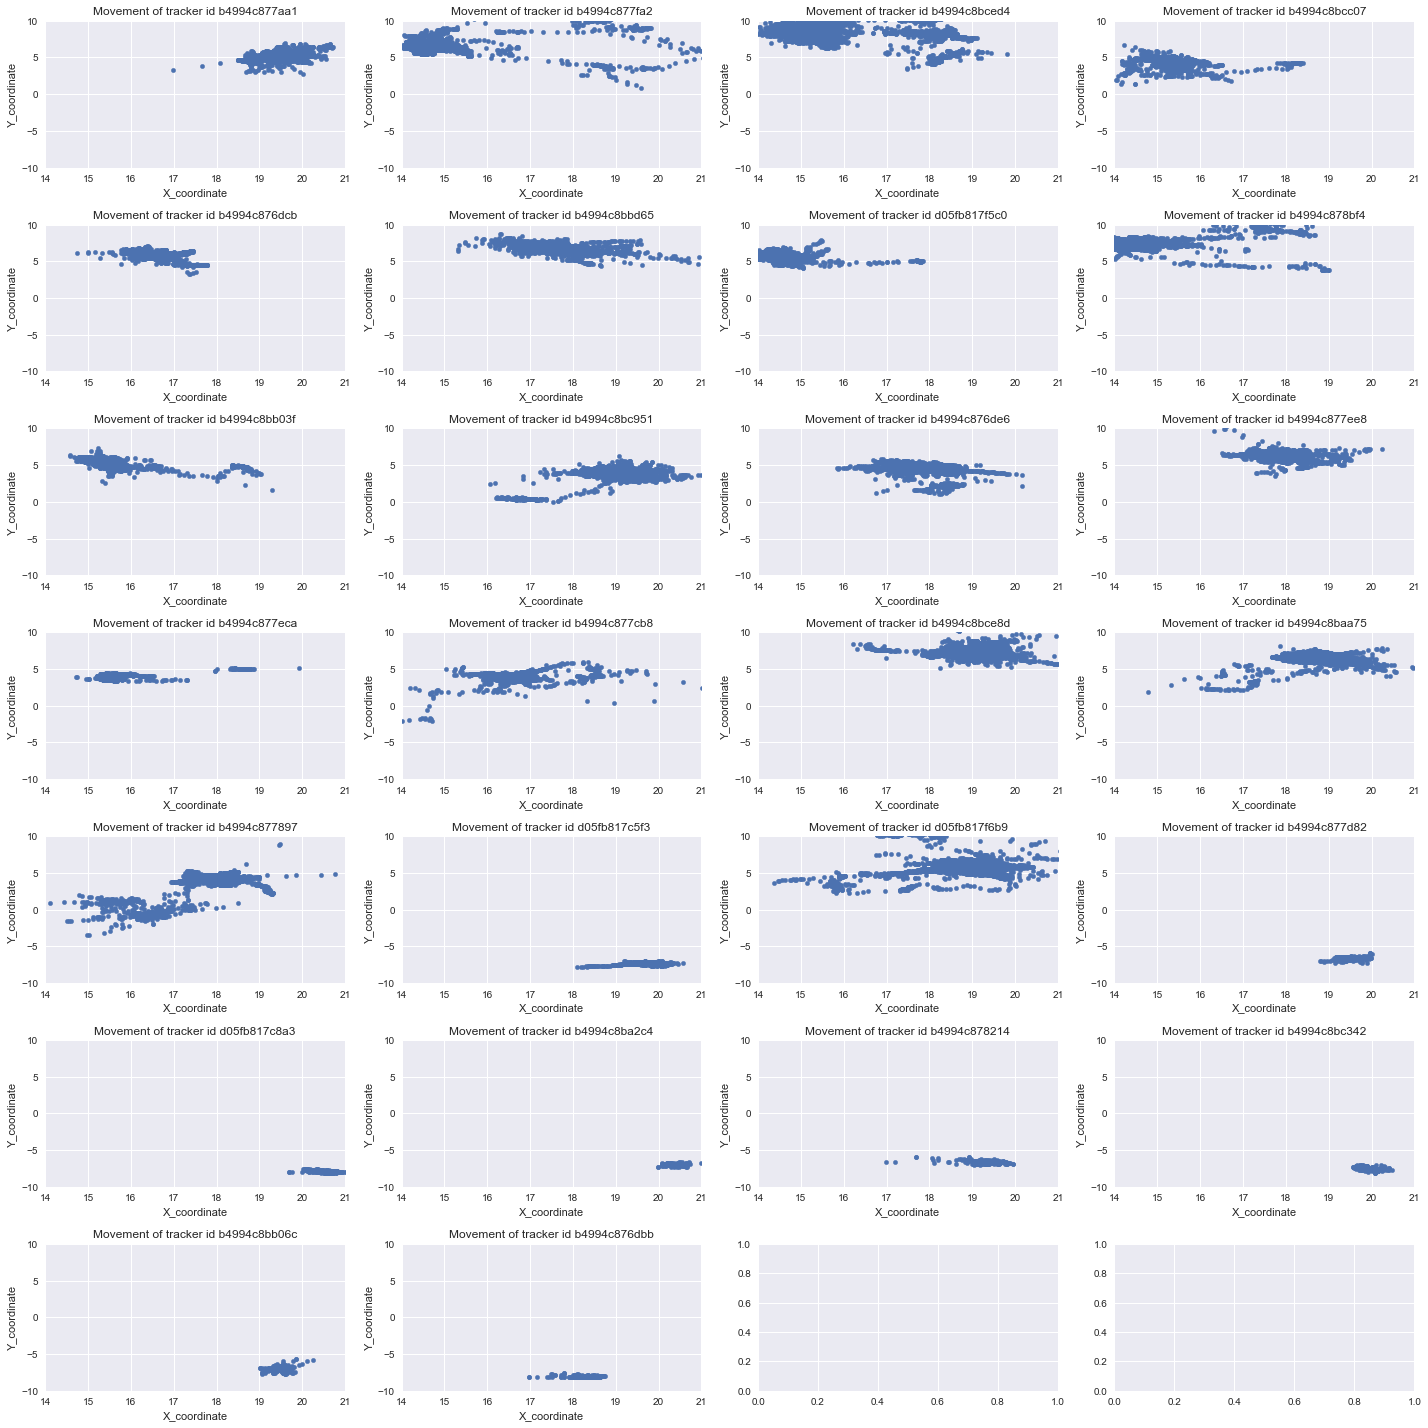

In [304]:
COL_NUM = 4
ROW_NUM = 7
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,20))
for i in range(len(ids)): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    data = pd.DataFrame({"X_coordinate":df[df['ID'] == ids[i]]['X_coordinate'],"Y_coordinate":df[df['ID'] == ids[i]]['Y_coordinate']})
    data.plot(x = "X_coordinate", y = "Y_coordinate", kind = 'scatter', ax=ax, xlim = (14,21), ylim = (-10,10))    
    ax.set_title("Movement of tracker id {}".format(ids[i]))
plt.tight_layout()

## K-means Clustering

In [305]:
X = np.array([list(a) for a in zip(df1['X_coordinate'],df1['Y_coordinate'])])

In [306]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

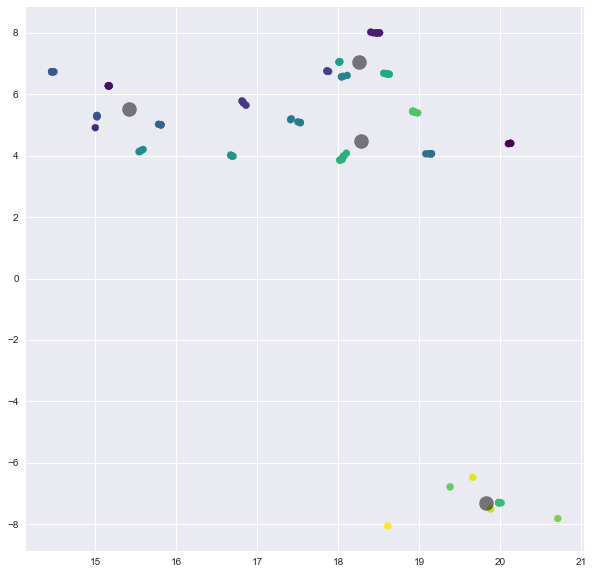

In [307]:
plt.scatter(X[:, 0], X[:, 1], c=colors, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

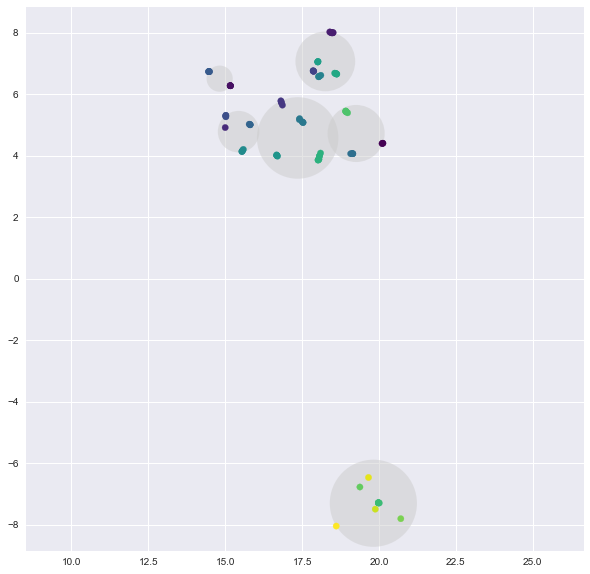

In [308]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=6, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=colors, s=40, cmap='viridis', zorder=2)
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
kmeans = KMeans(n_clusters=6, random_state=0)
plot_kmeans(kmeans, X)

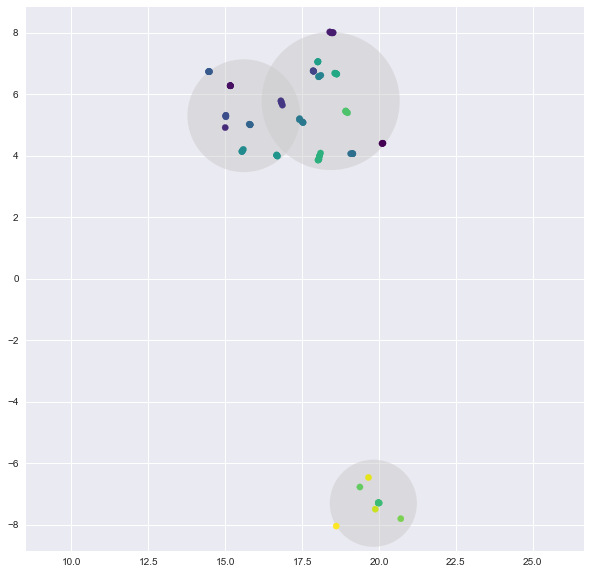

In [309]:
kmeans = KMeans(n_clusters=3, random_state=0)
plot_kmeans(kmeans, X)

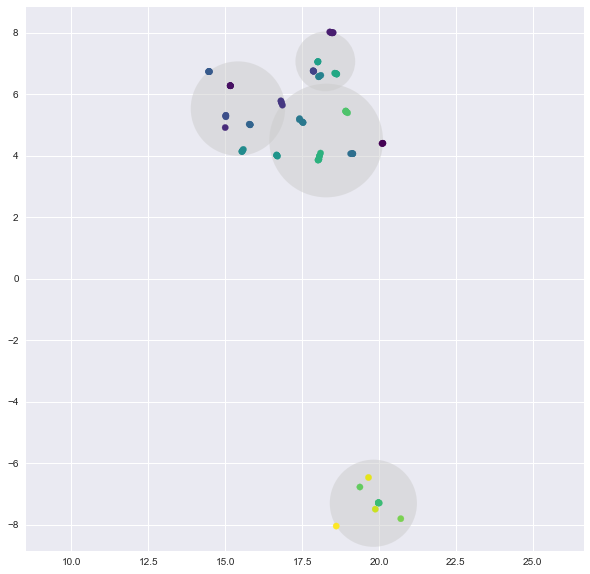

In [310]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

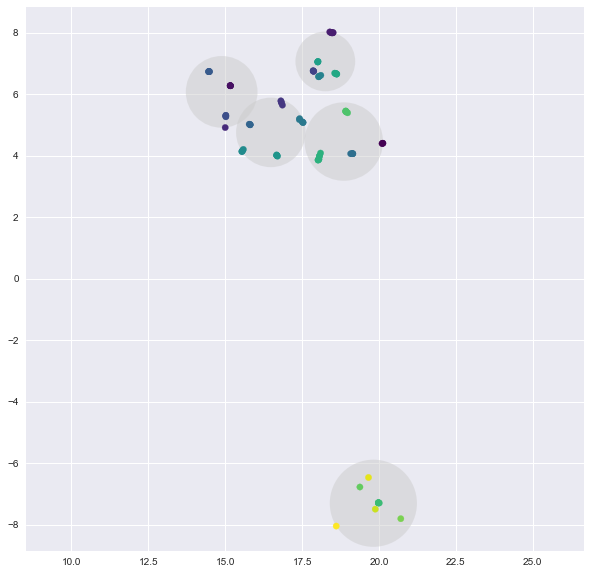

In [311]:
kmeans = KMeans(n_clusters=5, random_state=0)
plot_kmeans(kmeans, X)

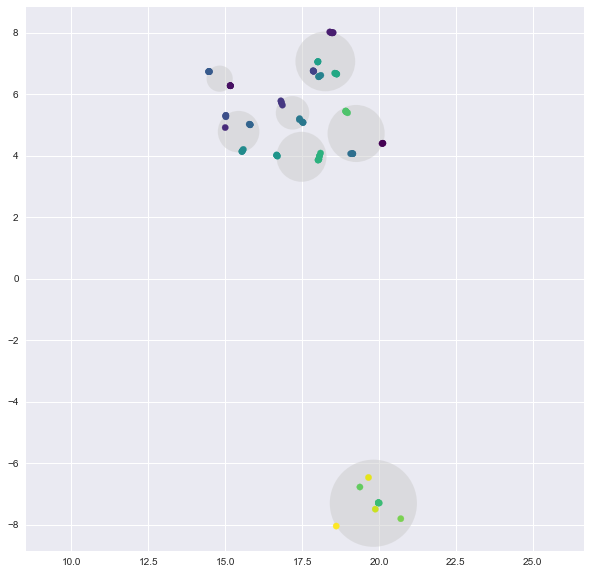

In [312]:
kmeans = KMeans(n_clusters=7, random_state=0)
plot_kmeans(kmeans, X)

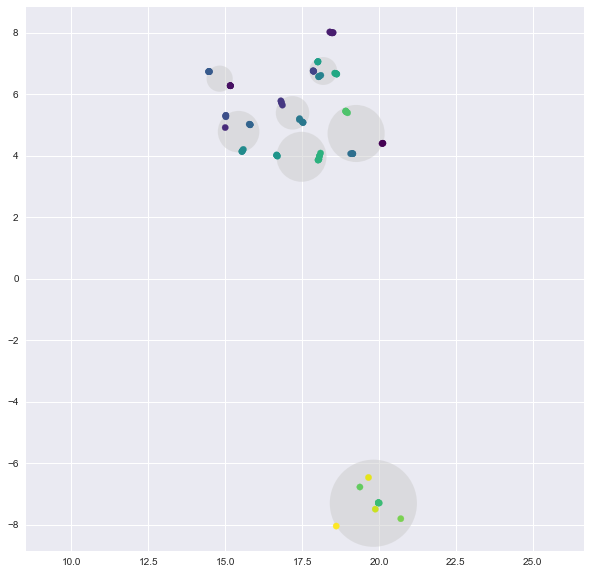

In [313]:
kmeans = KMeans(n_clusters=8, random_state=0)
plot_kmeans(kmeans, X)

## Gaussian Mixture Model

[[0.    0.    0.942 0.    0.058 0.   ]
 [0.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.92  0.08 ]
 [0.    1.    0.    0.    0.    0.   ]]


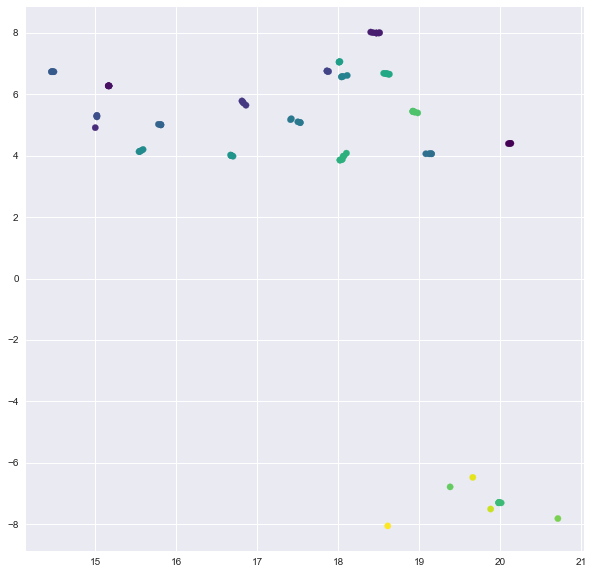

In [314]:
colors = np.array(df1['ID'].apply(ids.index))
colors
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=colors, s=40, cmap='viridis');
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

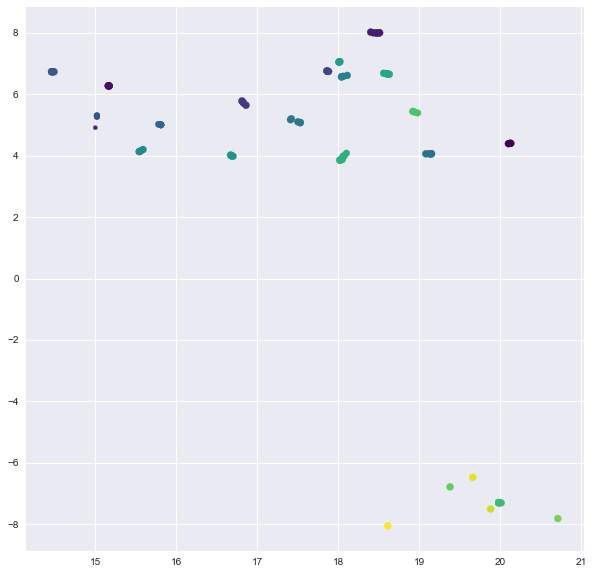

In [315]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=colors, cmap='viridis', s=size);

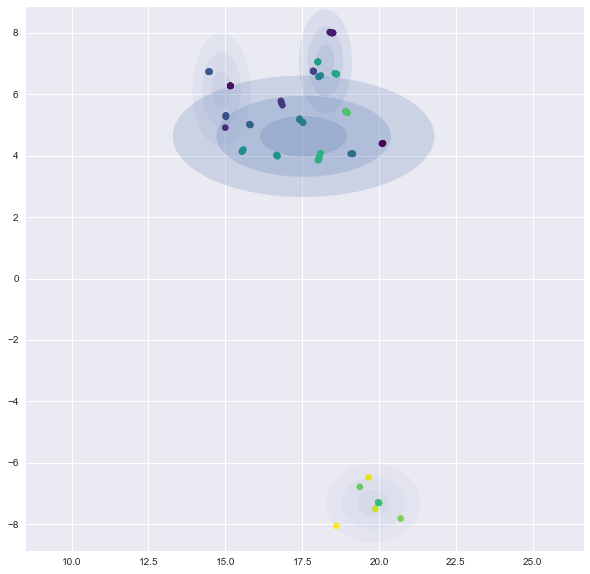

In [317]:
from sklearn.mixture import GMM
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)    
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=colors, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)

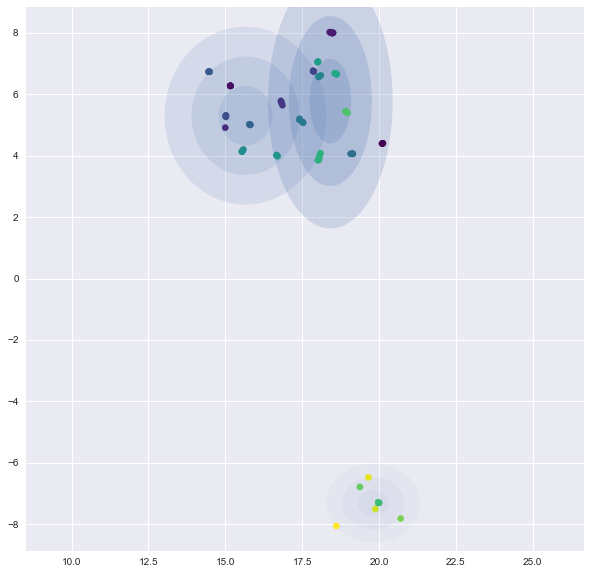

In [318]:
gmm = GMM(n_components=3, random_state=42)
plot_gmm(gmm, X)

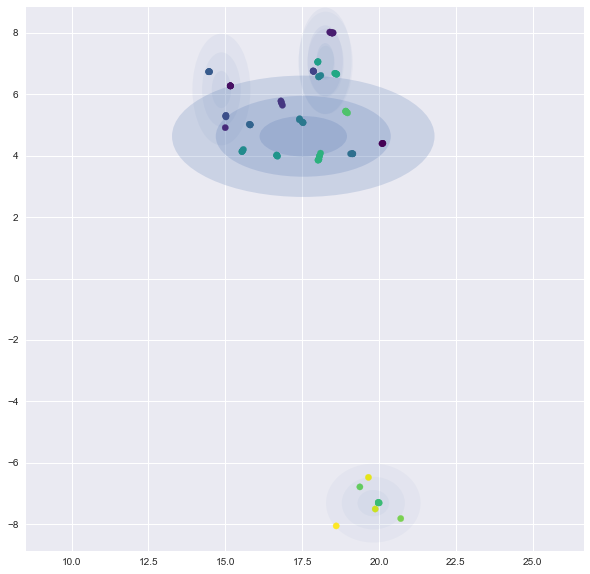

In [319]:
gmm = GMM(n_components=5, random_state=42)
plot_gmm(gmm, X)

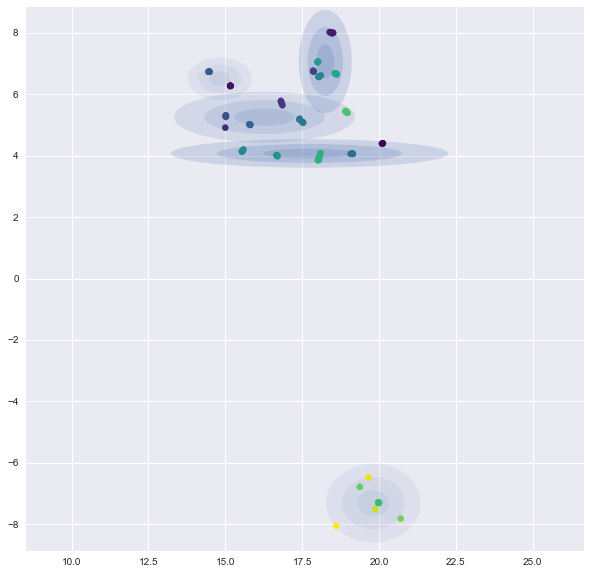

In [320]:
gmm = GMM(n_components=6, random_state=42)
plot_gmm(gmm, X)

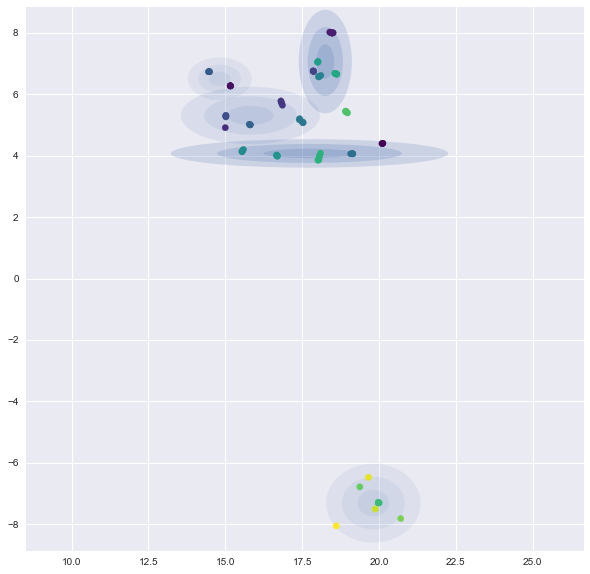

In [321]:
gmm = GMM(n_components=7, random_state=42)
plot_gmm(gmm, X)

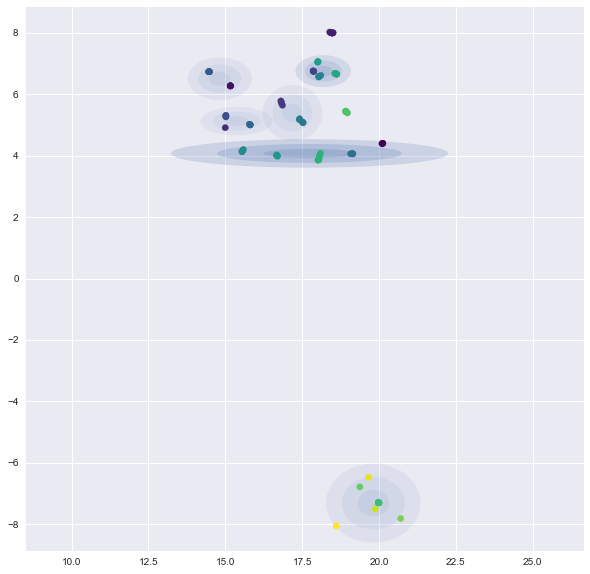

In [322]:
gmm = GMM(n_components=8, random_state=42)
plot_gmm(gmm, X)

## Mean Shift

In [354]:
from sklearn.cluster import MeanShift, estimate_bandwidth
ms = MeanShift(bandwidth = 2, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 2


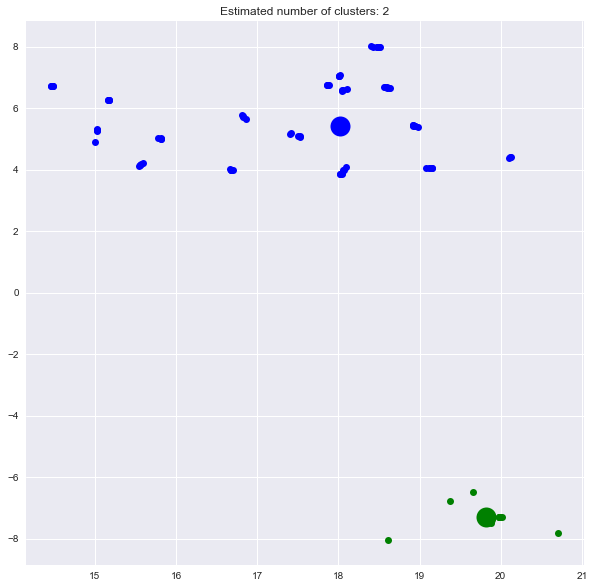

In [355]:
import matplotlib.pyplot as plt
from itertools import cycle
plt.figure(1)
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + 'o')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='b', markersize=20)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Dynamic Time Warping (DRAFT)

In [325]:
b4994c877aa1 = list()
for k, v in obj.items():
    if v['id'] == 'b4994c877aa1':
        b4994c877aa1.append([v['smoothedPosition'][0],v['smoothedPosition'][1]])
b4994c877aa1 = np.array(b4994c877aa1)

In [326]:
b4994c877fa2 = list()
for k, v in obj.items():
    if v['id'] == 'b4994c877fa2':
        b4994c877fa2.append([v['smoothedPosition'][0],v['smoothedPosition'][1]])
b4994c877fa2 = np.array(b4994c877fa2)

In [327]:
b4994c877aa1

array([[19.59,  7.01],
       [19.58,  6.84],
       [19.59,  6.7 ],
       ...,
       [18.51,  4.67],
       [18.51,  4.69],
       [18.49,  4.71]])

In [328]:
b4994c877fa2

array([[16.08,  4.97],
       [16.36,  4.69],
       [15.97,  6.25],
       ...,
       [18.49,  3.98],
       [18.48,  3.99],
       [18.47,  4.01]])

In [329]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
distance, path = fastdtw(b4994c877aa1, b4994c877fa2, dist=euclidean)
print(distance)

27349.802278246305


In [ ]:
def fastdtw_distance(x,y):
    import numpy as np
    from scipy.spatial.distance import euclidean
    from fastdtw import fastdtw
    distance, path = fastdtw(x, y, dist=euclidean)
    return distance

def create_pairwise_dist(X_data):
   # create a matrix of pair-wise distances

X_dist = create_pairwise_dist(X)

dbscan = DBSCAN(eps=1, metric=fastdtw_distance)
dbscan.fit(X_dist)